<a href="https://colab.research.google.com/github/Kaidus23/Skills-Assessment-2/blob/main/Visualization1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**(1) Loading the drive files**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**(2) Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

**(3) Loading the data and visualizing publication trends over time**

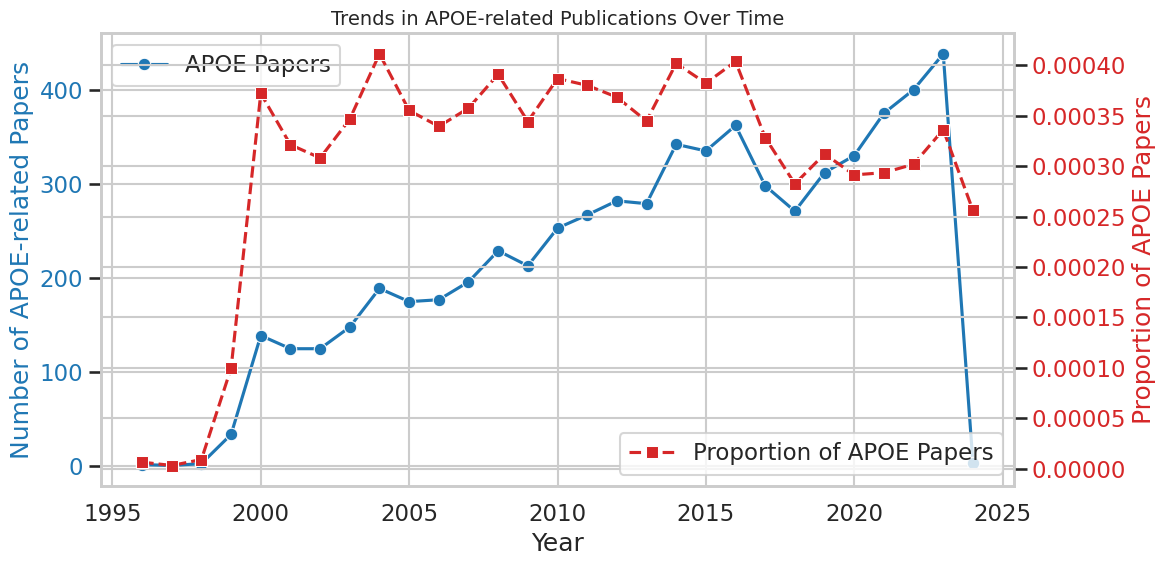

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
articles = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Assesment/Skills for Data Scientist/Group 4/articles.APOE.csv")
paper_counts = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Assesment/Skills for Data Scientist/Group 4/paper_counts.csv")

# Rename columns in paper_counts
paper_counts.rename(columns={'Count': 'Total_Papers'}, inplace=True)

# Group by Year to count APOE-related papers
articles_per_year = articles.groupby('Year').size().reset_index(name='APOE_Papers')

# Merge with total paper counts
trend_data = pd.merge(articles_per_year, paper_counts, on='Year', how='left')
trend_data.fillna(0, inplace=True)  # Handle missing values

# Convert to appropriate data types
trend_data['APOE_Papers'] = trend_data['APOE_Papers'].astype(int)
trend_data['Total_Papers'] = trend_data['Total_Papers'].astype(int)

# Compute proportion
trend_data['Proportion'] = trend_data['APOE_Papers'] / trend_data['Total_Papers']

# ---- Visualization ----
sns.set_style("whitegrid")
sns.set_context("talk")

fig, ax1 = plt.subplots(figsize=(12, 6))

# First axis (left) for APOE paper count
color1 = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of APOE-related Papers', color=color1)

# Ensure APOE Papers line appears in front by setting a higher zorder
sns.lineplot(x='Year', y='APOE_Papers', data=trend_data, ax=ax1,
             label='APOE Papers', color=color1, marker='o', zorder=3)
ax1.tick_params(axis='y', labelcolor=color1)

# Second axis (right) for Proportion
##
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel('Proportion of APOE Papers', color=color2)

# Lower zorder for the proportion line (to appear behind)
sns.lineplot(x='Year', y='Proportion', data=trend_data, ax=ax2,
             label='Proportion of APOE Papers', color=color2, marker='s', linestyle='dashed', zorder=2)
ax2.tick_params(axis='y', labelcolor=color2)

# Title and layout
plt.title('Trends in APOE-related Publications Over Time', fontsize=14)
fig.tight_layout()
plt.show()
